<a href="https://colab.research.google.com/github/DayaSribala/PCA/blob/main/Principal_Component_Analysis_and_Water_Quality_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and Water Quality Prediction using Machine learning**

**Install Pycaret**

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 

Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Seaborn version:  0.13.1


# Dataset

The “Water Quality Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about Water Quality and predict whether its safe or not.

There are 10 attributes with 295 entries and one column for classification. ***0 represents Not Safe and 1 represents Is Safe.***

All attributes are numerical and they are listed bellow:

1. Temperature
2. Dissolved_Oxygen
3. PH
4. BioChemical_Oxygen_Demand
5. Fecal_Streptococci
6. Nitrate
7. Fecal_Coliform
8. Total_Coliform
9. Conductivity
10. Water_Quality (Label)
The original dataset can be found on below link: https://www.kaggle.com/datasets/saraharsh/water-quality/

In [4]:
from google.colab import files
uploaded = files.upload()

Saving water quality.xlsx to water quality.xlsx


In [5]:
df=pd.read_excel('/content/water quality.xlsx')

In [6]:
len(df.index)

295

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                295 non-null    float64
 1   Dissolved_Oxygen           295 non-null    float64
 2   pH                         295 non-null    float64
 3   BioChemical_Oxygen_Demand  295 non-null    float64
 4   Fecal_Streptococci         295 non-null    float64
 5   Nitrate                    295 non-null    float64
 6   Fecal_Coliform             295 non-null    float64
 7   Total_Coliform             295 non-null    float64
 8   Conductivity               295 non-null    float64
 9   Water_Quality              295 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 23.2 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

In [10]:
sns.pairplot(df, hue='Water_Quality')
plt.show()

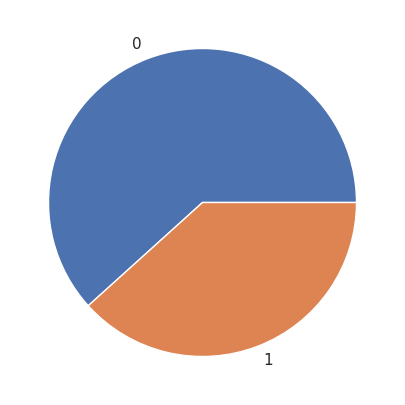

In [11]:
y =df['Water_Quality']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [12]:
X = df.drop(columns=['Water_Quality'])
X.head(10)

Temperature  Dissolved_Oxygen    pH  BioChemical_Oxygen_Demand  \
0          7.5              9.95  7.85                       0.15   
1         11.0              9.65  7.70                       0.45   
2          7.5              9.90  7.65                       0.55   
3          8.5              9.65  7.55                       0.35   
4         10.0              9.55  7.80                       0.25   
5         11.0              9.45  7.75                       0.85   
6          9.5              9.55  7.90                       0.50   
7         10.5              9.85  7.70                       0.25   
8         14.5              9.80  7.95                       0.25   
9         16.5              9.25  7.65                       0.25   

   Fecal_Streptococci  Nitrate  Fecal_Coliform  Total_Coliform  Conductivity  
0                90.0    0.255            22.5           180.0         134.5  
1               205.0    0.200            62.5           410.0          77.0  
2               100.0    0.100            26.0           200.0         101.5  
3               300.0    0.250            97.5           600.0         148.0  
4               190.0    0.150            47.5           380.0         106.0  
5               222.5    0.300            67.0           445.0          97.5  
6               285.0    0.195            74.5           570.0         203.5  
7               145.0    0.115            60.0           290.0          95.5  
8               112.5    0.100            26.5           225.0          99.0  
9               147.5    0.150            66.0           295.0         111.5

In [13]:
X.describe().transpose()

count          mean           std   min      25%  \
Temperature                295.0     20.903898      6.051566  0.00   18.000   
Dissolved_Oxygen           295.0      7.342034      1.910113  0.00    6.850   
pH                         295.0      7.754627      0.378879  5.35    7.550   
BioChemical_Oxygen_Demand  295.0      3.544136      9.043299  0.00    0.725   
Fecal_Streptococci         295.0   7463.333729  26272.135186  0.00   29.225   
Nitrate                    295.0      0.870915      1.431247  0.00    0.155   
Fecal_Coliform             295.0   5983.661695  22934.986514  0.00    4.000   
Total_Coliform             295.0  14926.667458  52544.270371  0.00   58.450   
Conductivity               295.0    501.860678    798.311280  0.00  208.250   

                              50%      75%        max  
Temperature                 22.50    25.55      30.50  
Dissolved_Oxygen             7.75     8.60      10.25  
pH                           7.75     8.00       8.60  
BioChemical_Oxygen_Demand    1.60     3.10     123.50  
Fecal_Streptococci         240.00  2650.00  229000.00  
Nitrate                      0.55     0.95      14.05  
Fecal_Coliform              79.50  2375.00  251000.00  
Total_Coliform             480.00  5300.00  458000.00  
Conductivity               299.50   438.25    9272.00

**Standardize the Data**

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature  Dissolved_Oxygen        pH  BioChemical_Oxygen_Demand  \
0    -2.218711          1.367666  0.252152                  -0.375958   
1    -1.639365          1.210341 -0.144426                  -0.342728   
2    -2.218711          1.341445 -0.276619                  -0.331651   
3    -2.053183          1.210341 -0.541004                  -0.353805   
4    -1.804892          1.157899  0.119959                  -0.364882   
5    -1.639365          1.105457 -0.012233                  -0.298421   
6    -1.887656          1.157899  0.384344                  -0.337190   
7    -1.722129          1.315224 -0.144426                  -0.364882   
8    -1.060020          1.289003  0.516537                  -0.364882   
9    -0.728965          1.000573 -0.276619                  -0.364882   

   Fecal_Streptococci   Nitrate  Fecal_Coliform  Total_Coliform  Conductivity  
0           -0.281129 -0.431066       -0.260357       -0.281129     -0.460954  
1           -0.276744 -0.469559       -0.258610       -0.276744     -0.533104  
2           -0.280748 -0.539547       -0.260204       -0.280748     -0.502362  
3           -0.273122 -0.434565       -0.257082       -0.273122     -0.444015  
4           -0.277316 -0.504553       -0.259265       -0.277316     -0.496715  
5           -0.276077 -0.399571       -0.258414       -0.276077     -0.507381  
6           -0.273694 -0.473059       -0.258086       -0.273694     -0.374375  
7           -0.279032 -0.529049       -0.258719       -0.279032     -0.509890  
8           -0.280271 -0.539547       -0.260183       -0.280271     -0.505499  
9           -0.278937 -0.504553       -0.258457       -0.278937     -0.489814

In [15]:
X.describe().transpose()

count          mean       std       min       25%  \
Temperature                295.0  9.634478e-17  1.001699 -3.460165 -0.480674   
Dissolved_Oxygen           295.0 -2.890343e-16  1.001699 -3.850300 -0.258032   
pH                         295.0 -2.962602e-15  1.001699 -6.357480 -0.541004   
BioChemical_Oxygen_Demand  295.0  0.000000e+00  1.001699 -0.392573 -0.312267   
Fecal_Streptococci         295.0 -2.408619e-17  1.001699 -0.284561 -0.283446   
Nitrate                    295.0 -7.225858e-17  1.001699 -0.609535 -0.501054   
Fecal_Coliform             295.0 -2.408619e-17  1.001699 -0.261340 -0.261165   
Total_Coliform             295.0 -2.408619e-17  1.001699 -0.284561 -0.283446   
Conductivity               295.0  3.612929e-17  1.001699 -0.629721 -0.368415   

                                50%       75%        max  
Temperature                0.264198  0.769057   1.588416  
Dissolved_Oxygen           0.213945  0.659701   1.524992  
pH                        -0.012233  0.648730   2.235041  
BioChemical_Oxygen_Demand -0.215346 -0.049196  13.287153  
Fecal_Streptococci        -0.275410 -0.183522   8.446710  
Nitrate                   -0.224602  0.055350   9.223758  
Fecal_Coliform            -0.257868 -0.157610  10.701235  
Total_Coliform            -0.275410 -0.183522   8.446710  
Conductivity              -0.253917 -0.079817  11.004532

**Observations and variables**

In [16]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

In [17]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-17-774acb9c9bc7>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


In [18]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-18-b50664f0e877>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


**Correlation Matrix**

In [19]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

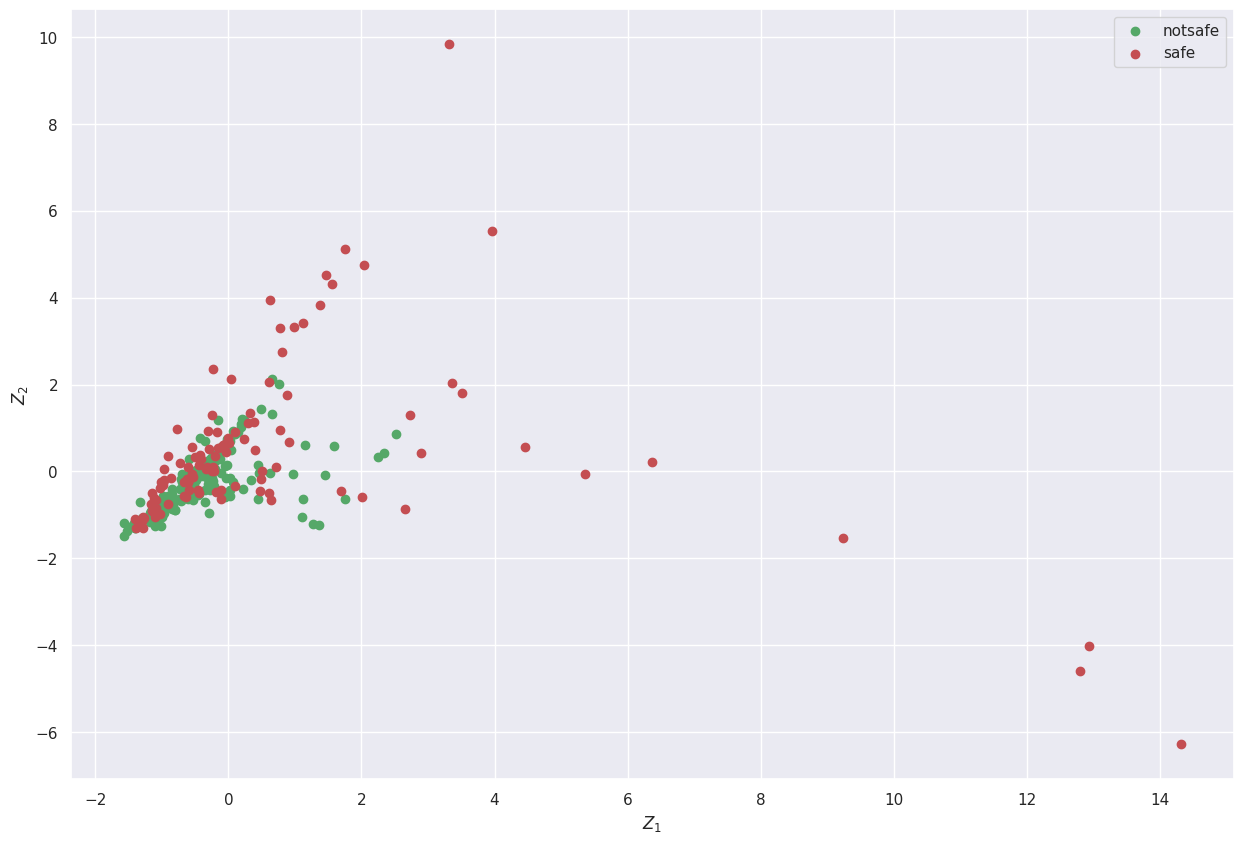

In [20]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_notsafe= np.where(y == 0)
idx_safe = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_notsafe,0], Z[idx_notsafe,1], c='g', label='notsafe')
plt.scatter(Z[idx_safe,0], Z[idx_safe,1], c='r', label='safe')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 2.46764338e-01,  2.13595236e-01, -5.31727186e-02,
        -5.67805564e-01,  5.03514748e-01,  5.03530642e-01,
         2.47182236e-01,  9.20179950e-03, -5.29854161e-17],
       [-3.26710043e-01, -4.81950626e-01,  1.83902481e-01,
         1.10130594e-01,  2.54869816e-02,  1.01824815e-01,
         7.76768499e-01, -2.54576344e-02, -5.90173160e-17],
       [-8.04275302e-02, -2.25918101e-01,  7.44258563e-01,
        -3.79784086e-01,  2.50423257e-01, -3.36333304e-01,
        -2.61088649e-01, -1.83434327e-02, -2.35047094e-17],
       [ 1.68505905e-01,  5.43449883e-01,  7.73949316e-02,
        -2.22693716e-01, -2.47112295e-01, -5.54734363e-01,
         5.01455667e-01, -2.08094222e-02,  3.77421681e-17],
       [ 5.16094373e-01, -2.38213339e-01,  3.57874709e-02,
         7.15947914e-02, -6.02101241e-02, -2.03470354e-02,
         4.19881636e-02, -4.05822843e-01,  7.07106781e-01],
       [ 8.08119207e-02,  2.99776208e-01,  1.70578308e-01,
         6.38609955e-01,  6.64121479e-01, -1.333450

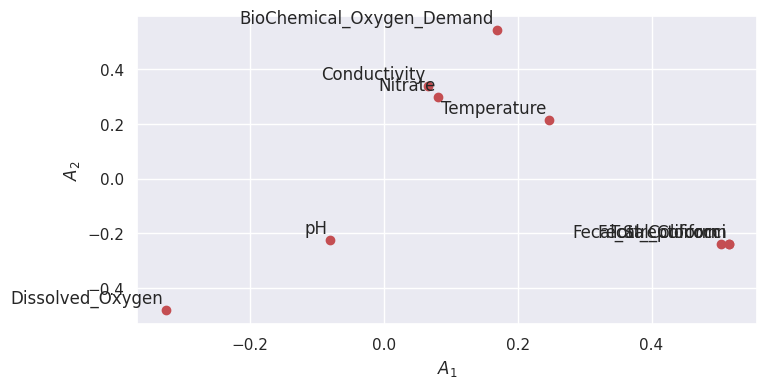

In [21]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


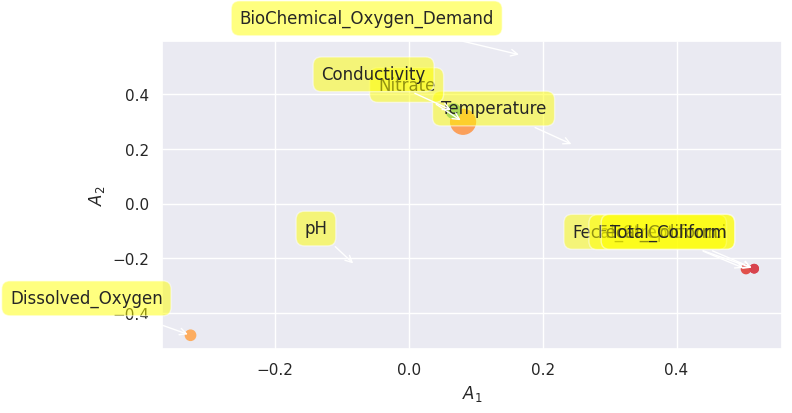

In [22]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

array([3.30749413e+00, 1.77564860e+00, 1.08542748e+00, 9.84112730e-01,
       8.51277728e-01, 6.56276252e-01, 3.01428165e-01, 6.89471524e-02,
       6.08348303e-33])

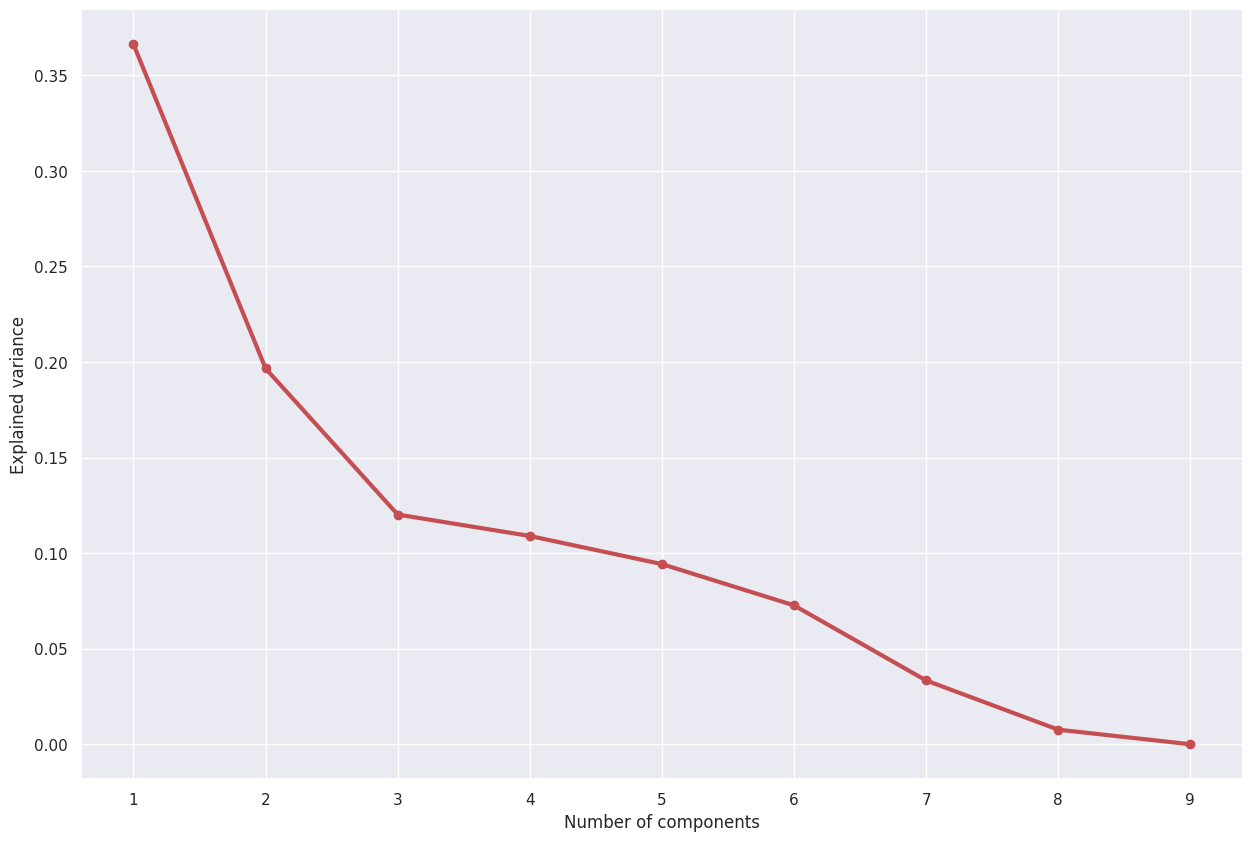

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

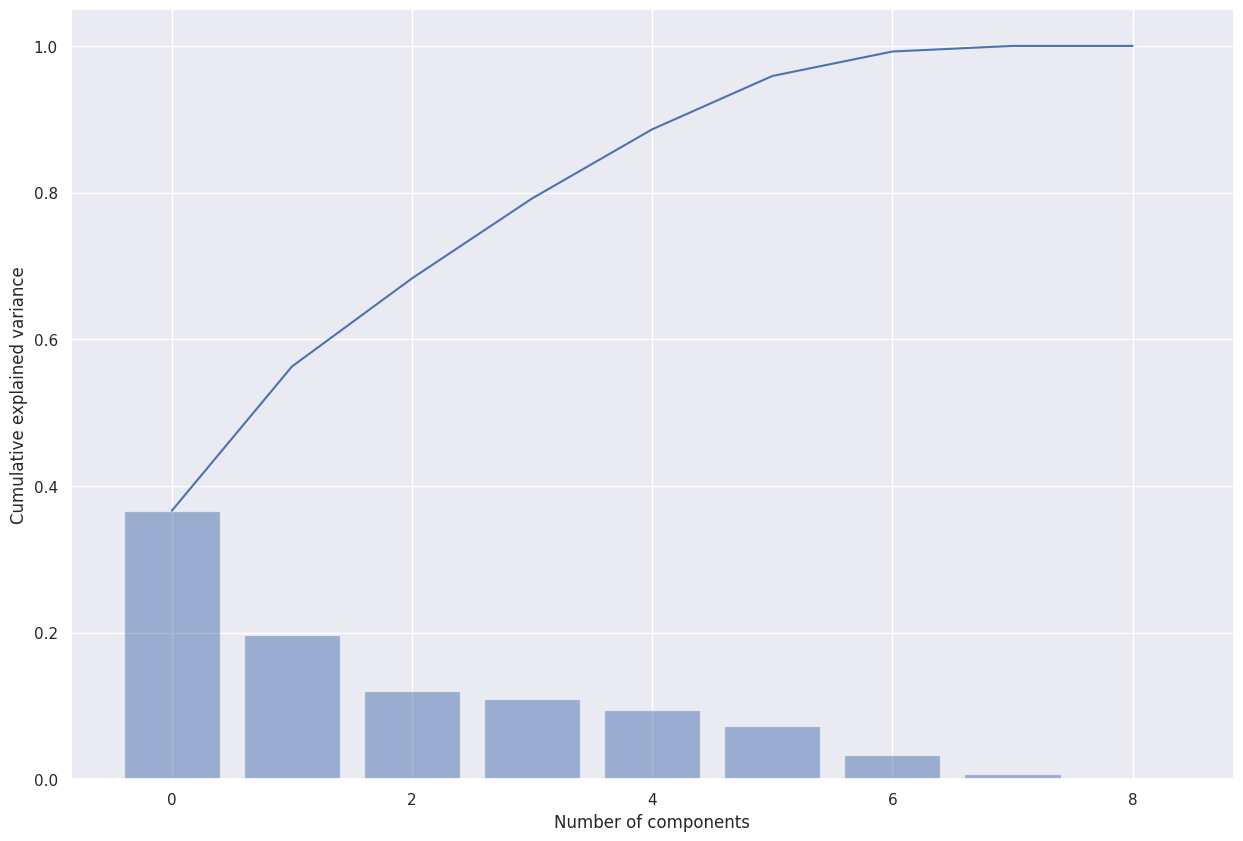

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

In [26]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_notsafe,0], Z[idx_notsafe,1], c='r', label='notsafe')
plt.scatter(Z[idx_safe,0], Z[idx_safe,1], c='g', label='safe')

plt.legend(loc='upper left')
Z1
Z2

array([-1.48344045e+00, -1.21472118e+00, -1.37403939e+00, -1.18094133e+00,
       -1.29429821e+00, -1.14062410e+00, -1.30775616e+00, -1.30383648e+00,
       -1.29981686e+00, -8.96150488e-01, -1.03183057e+00, -1.05691564e+00,
       -1.16320707e+00, -1.16678054e+00, -1.06090750e+00, -1.08184926e+00,
       -6.96546735e-01, -7.14766088e-01, -7.04351558e-01, -7.56410406e-01,
       -6.49055810e-01, -5.25683934e-01, -1.21527060e+00, -6.98248823e-01,
       -7.14105087e-01, -2.50596770e-01, -4.01073967e-01, -3.40961150e-01,
       -4.10411595e-01, -1.40716709e-01, -1.26029956e-01, -3.71172673e-01,
       -2.37868872e-01, -4.01368025e-01, -1.84464153e-01, -5.06929608e-01,
       -2.37010975e-01, -1.94482508e-01, -2.41217327e-01, -3.03075119e-01,
       -3.72987049e-01, -2.47913221e-01, -9.12315258e-01, -8.95571129e-01,
       -1.44806952e-01, -1.05714901e+00, -1.26012873e+00, -7.38647593e-01,
       -6.11729202e-01, -5.68454812e-02, -1.65603107e-01,  2.79633380e-01,
        7.69704382e-01, -

**Using PCA Library**

In [27]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.6 MB/s eta 0:00:00


In [28]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [29]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6
0   -1.564800 -1.483440  0.139644  0.961412 -0.977922 -1.020041
1   -1.335445 -1.214721 -0.262627  0.719034 -0.793940 -0.663618
2   -1.517289 -1.374039 -0.298895  1.071368 -1.176856 -0.877433
3   -1.394271 -1.180941 -0.476241  1.149227 -1.113126 -0.689109
4   -1.385484 -1.294298 -0.052373  0.697105 -0.845198 -0.804502
..        ...       ...       ...       ...       ...       ...
290 -0.207386  0.047076 -0.233136 -1.167279  0.543149  0.627939
291 -0.214490  0.018008 -0.040755 -1.262638  0.622574  0.513857
292 -0.348550  0.009903 -0.407491 -0.539724  0.371358  0.491349
293 -0.076064  0.612420  0.818420 -0.940391 -0.161654  1.440630
294  0.627978  3.947650  6.755018  1.020092 -4.108309  6.644659

[295 rows x 6 columns]

**Scatter Plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '6 Principal Components explain [99.23%] of the variance'}, xlabel='PC1 (36.6% expl.var)', ylabel='PC2 (19.6% expl.var)'>)

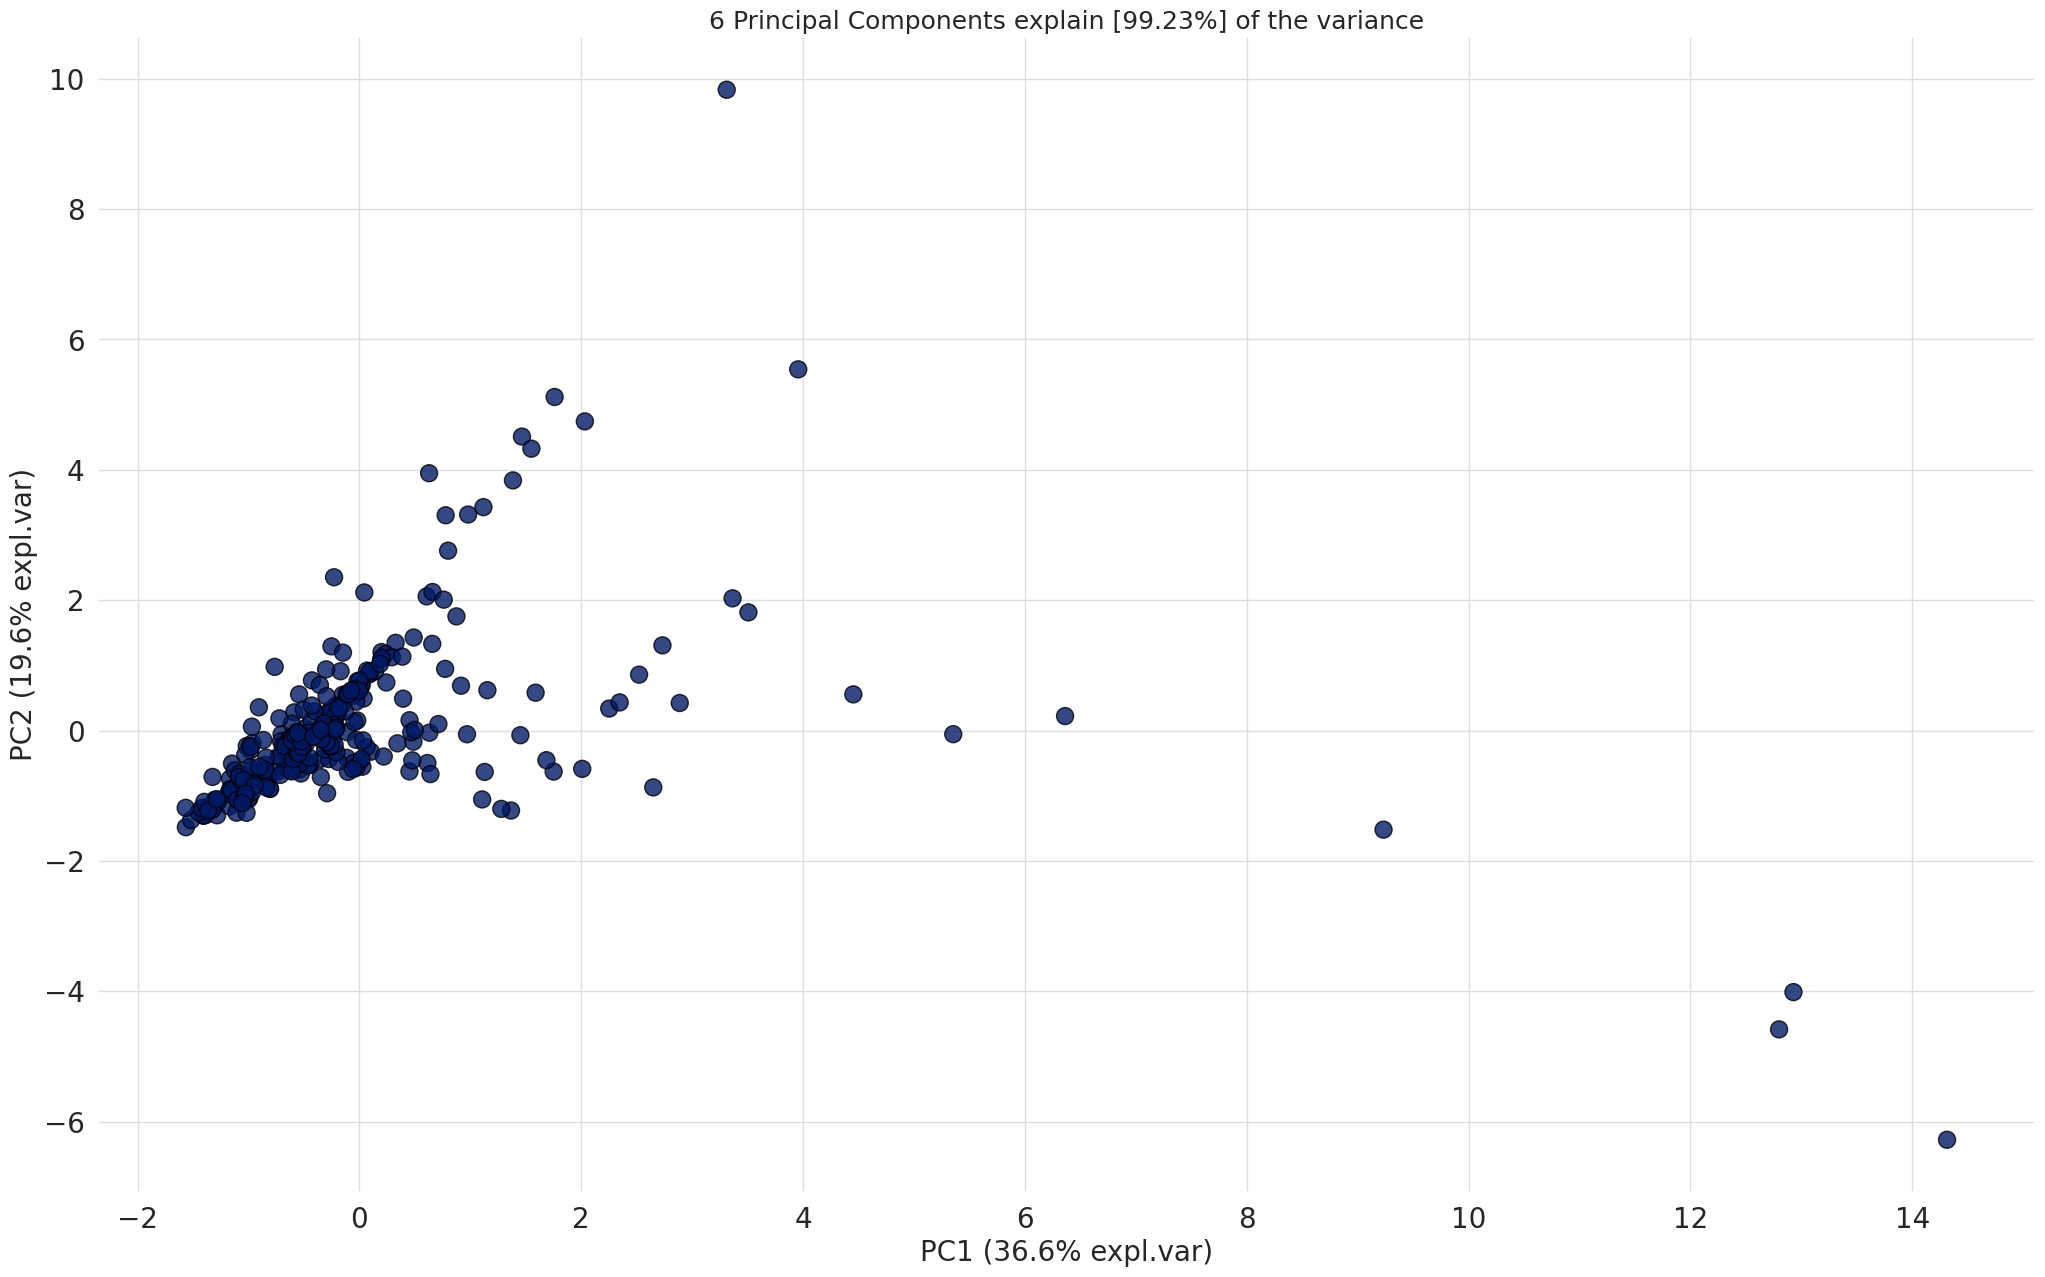

In [30]:
model.scatter(label=True, legend=False)

EigenVectors

In [31]:
A = out['loadings'].T
A


PC1       PC2       PC3       PC4       PC5  \
Temperature                0.246764  0.213595 -0.053173 -0.567806  0.503515   
Dissolved_Oxygen          -0.326710 -0.481951  0.183902  0.110131  0.025487   
pH                        -0.080428 -0.225918  0.744259 -0.379784  0.250423   
BioChemical_Oxygen_Demand  0.168506  0.543450  0.077395 -0.222694 -0.247112   
Fecal_Streptococci         0.516094 -0.238213  0.035787  0.071595 -0.060210   
Nitrate                    0.080812  0.299776  0.170578  0.638610  0.664121   
Fecal_Coliform             0.503832 -0.239748  0.057428  0.085898 -0.035824   
Total_Coliform             0.516094 -0.238213  0.035787  0.071595 -0.060210   
Conductivity               0.066493  0.338951  0.607030  0.214911 -0.415278   

                                PC6  
Temperature                0.503531  
Dissolved_Oxygen           0.101825  
pH                        -0.336333  
BioChemical_Oxygen_Demand -0.554734  
Fecal_Streptococci        -0.020347  
Nitrate                   -0.133345  
Fecal_Coliform            -0.057157  
Total_Coliform            -0.020347  
Conductivity               0.541629

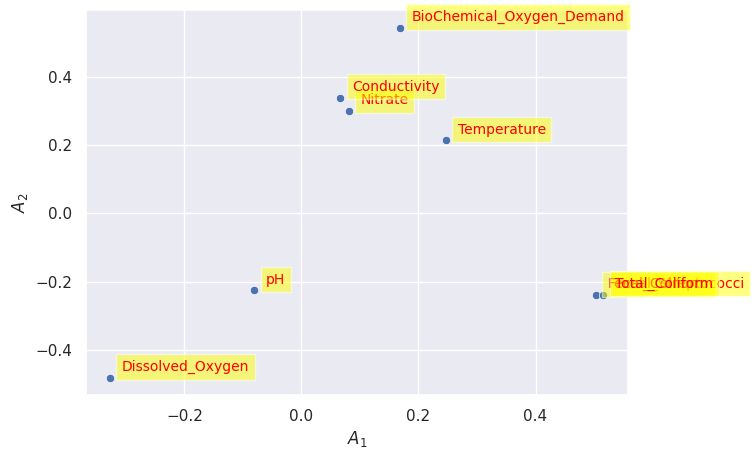

In [33]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

SCree Plot

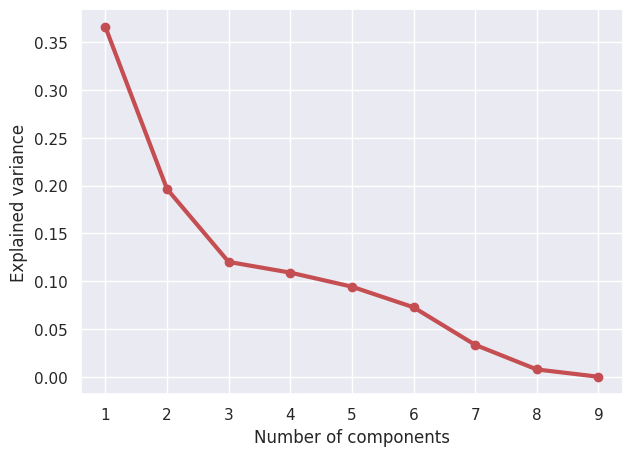

In [34]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Explained Variance Plot

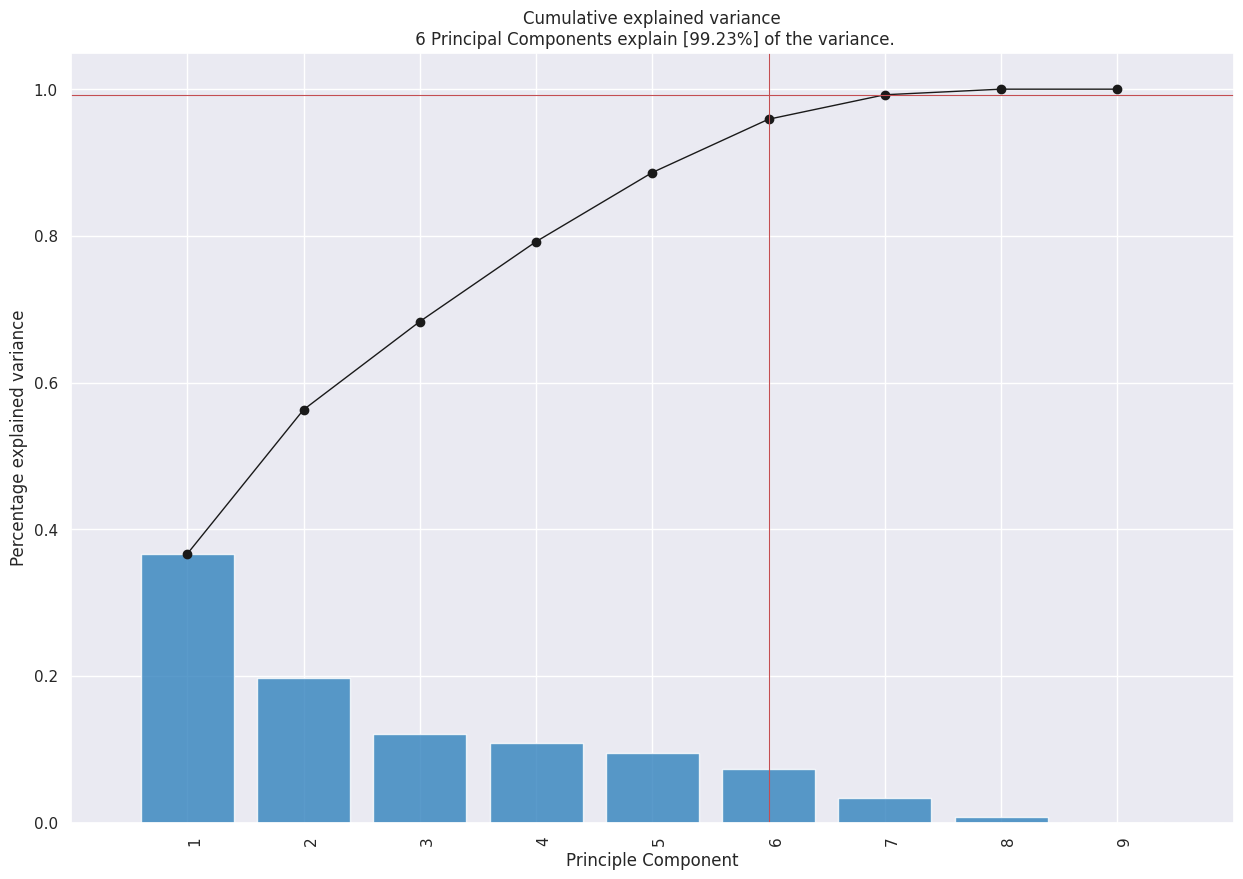

In [35]:
model.plot();

Biplot

In [36]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '6 Principal Components explain [99.23%] of the variance'}, xlabel='PC1 (36.6% expl.var)', ylabel='PC2 (19.6% expl.var)'>)

In [37]:
model.biplot3d(legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '6 Principal Components explain [99.23%] of the variance'}, xlabel='PC1 (36.6% expl.var)', ylabel='PC2 (19.6% expl.var)', zlabel='PC3 (12.0% expl.var)'>)

**Classification using Pycaret**
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [38]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
#For Google Colab only
 #from pycaret.utils import enable_colab
 #enable_colab()

In [39]:
pip install pycaret

In [40]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (266, 10)
Unseen Data For Predictions: (29, 10)


In [41]:
from pycaret.classification import *
clf = setup(data=data, target='Water_Quality', train_size=0.7, session_id=123)

**Comparing All Models**

In [42]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [43]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

Create a Model

**Logistic Regresssion**

In [44]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune the model

In [45]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [46]:
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**

In [47]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Create model with K-nearest neighbour

In [48]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune model with K-nearest neighbour

In [49]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [50]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

**Evaluate model with K-nearest neighbour**

In [51]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Quadratic Discriminant Analysis**

In [52]:
qda=create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA Model**

In [53]:
tuned_qda=tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate QDA Model**

In [54]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [55]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
!pip install statsmodels --upgrade

**Classification + PCA**

In [59]:
clf_pca = setup(data=data, target='Water_Quality', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)


**Comparing Models**

In [60]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Best model with PCA**

In [61]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Best Model**

In [62]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Best Model**

In [63]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [64]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Model**

In [65]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Model**

In [66]:
tuned_lr_pca

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K-nearest neighbour Model**

In [68]:
knn_pca = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Model**

In [69]:
tuned_knn_pca = tune_model(knn_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [70]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

**Evaluate Model KNN**

In [71]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Quadratic Discriminant Analysis Model**

In [72]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model**

In [73]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Model**

In [74]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [75]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Explainable AI with Shapley values**

For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [76]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [77]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [78]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [79]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [80]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.0 MB/s eta 0:00:00


In [81]:
import shap

In [83]:
pip install pycaret[analysis]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [85]:
pip install shap


In [87]:
pip install --upgrade pycaret[analysis]

In [90]:
!pip show shap

Name: shap
Version: 0.44.1
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm
Required-by: explainerdashboard


In [ ]:

interpret_model(tuned_et_pca, plot='summary')

In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32,matplotlib=True)

In [ ]:
interpret_model(tuned_et_pca, plot='reason')